 We Are Going To Predict Car Price with the Help of Cardekho Kaggle Dataset.
 

In [1]:
# Importing Reqiured Libraries
import numpy as np
import pandas as pd
import seaborn as sns


# Data-Preprocessing

In [2]:
# Importing DataSet.
df = pd.read_csv('car data.csv', header = 0)

In [3]:
# Viewing head part of our DataFrame
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape    # We have 301 Rows and 9 Columns

(301, 9)

In [5]:
#  Getting info about dataframe:
df.info()                    # The Column have dtype == Object are my Catogorical Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 16.5+ KB


In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


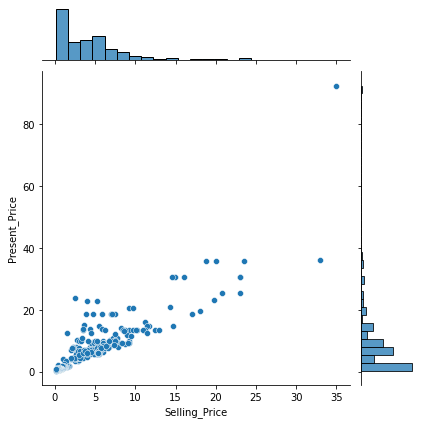

In [7]:
# to check Outliers
sns.jointplot(x= 'Selling_Price', y = 'Present_Price', data = df)


Outlier are present in Right Most Part of Graph

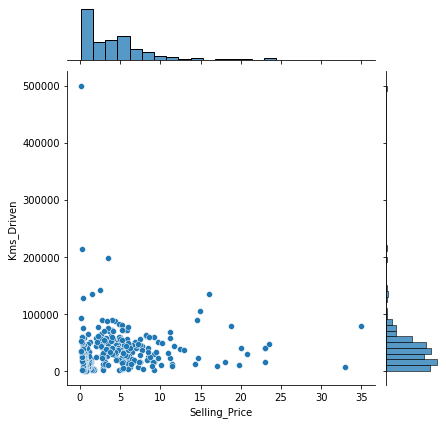

In [8]:
# To check Outliers in Km-driven
sns.jointplot(x= 'Selling_Price', y= 'Kms_Driven', data = df)

Outliers Are Present in Rightmost Part of our Graph

<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

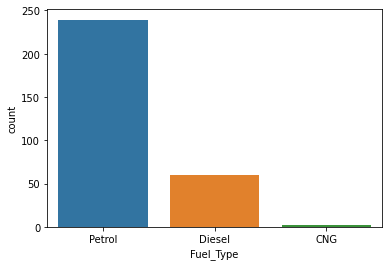

In [9]:
# Now Dealing With Catogorical Variables
sns.countplot( x = 'Fuel_Type', data = df)

So During Creating Dummy Variables we can del Cng Column as non petrol and non diesel car will be an Cng car

<AxesSubplot:xlabel='Seller_Type', ylabel='count'>

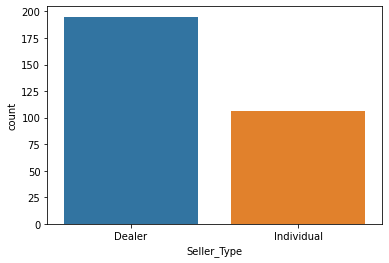

In [10]:
sns.countplot( x = 'Seller_Type', data = df)

Either Seller will be Individual or Dealer , We can remove one of them during Dummy variable creation

<AxesSubplot:xlabel='Transmission', ylabel='count'>

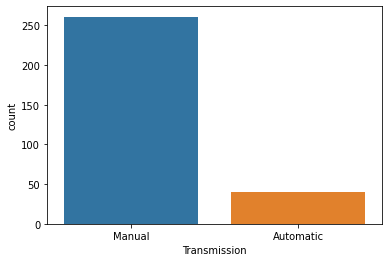

In [11]:
sns.countplot( x = 'Transmission', data = df)

We Can Remove automatic during dummy variable creation

In [12]:
# Observation of Data- Preprocessing
#1) There is no Missing values in data so missing value imputation is not required
#2) Outliers Are present in Present_price and Kms_driven, they can be removed with help of capping and flooring technique
#3) Catorgerical Variable Can be Converted into Binary form with help of dummy variable creation
#4) Car Name is Not required We can Delete Column of Carname from our Dataset


# 1) Dealing with Outliers 

In [13]:
# From above Joint_Plots we can see that outliers are on the Rightmost Part of our Graph
# Using Capping and Flooring Technique

upper_limit = np.percentile(df.Present_Price, [99])[0]
upper_limit


35.96

In [14]:
# Now finding the values which are greater than upper_limit in df.Present_price
df.Present_Price[(df.Present_Price > upper_limit)]

64    36.23
86    92.60
Name: Present_Price, dtype: float64

In [15]:
# Setting value 
df.Present_Price[(df.Present_Price > 2*upper_limit)] = 2*upper_limit

<ipython-input-15-7058e88717fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Present_Price[(df.Present_Price > 2*upper_limit)] = 2*upper_limit


In [16]:
df[(df.Present_Price > upper_limit)]   # we can See the Value is set to 71.92

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
64,fortuner,2017,33.0,36.23,6000,Diesel,Dealer,Automatic,0
86,land cruiser,2010,35.0,71.92,78000,Diesel,Dealer,Manual,0


In [17]:
upper_limit_2 = np.percentile(df.Kms_Driven, [99])[0]
upper_limit_2

142000.0

In [18]:
df[(df.Kms_Driven > upper_limit_2)]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
84,innova,2005,3.49,13.46,197176,Diesel,Dealer,Manual,0
179,Honda Karizma,2010,0.31,1.05,213000,Petrol,Individual,Manual,0
196,Activa 3g,2008,0.17,0.52,500000,Petrol,Individual,Automatic,0


Since Kms_Driven Cant be changed we are only changing Selling_price of Land_cruisner car

# 2) Dummy Variable Creation

We will Get many Dummy variables as our data contain names of car,
So deleting Car Name is preferred as it will not affect price

In [19]:
del df['Car_Name']

In [20]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [21]:
# Creating Dummy Vaiables
df = pd.get_dummies(df)

In [22]:
df.head(6)

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,0,1,1,0,0,1
1,2013,4.75,9.54,43000,0,0,1,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,0,1,1,0,0,1
3,2011,2.85,4.15,5200,0,0,0,1,1,0,0,1
4,2014,4.60,6.87,42450,0,0,1,0,1,0,0,1
5,2018,9.25,9.83,2071,0,0,1,0,1,0,0,1


In [23]:
# so Removing Unwanted Columns from Data-set
del df['Fuel_Type_CNG']
del df['Seller_Type_Individual']
del df['Transmission_Automatic']

In [24]:
# Now our dataset Looks Like
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,1,1,1
1,2013,4.75,9.54,43000,0,1,0,1,1
2,2017,7.25,9.85,6900,0,0,1,1,1
3,2011,2.85,4.15,5200,0,0,1,1,1
4,2014,4.60,6.87,42450,0,1,0,1,1


Since Year Column can be Replaced with how many year the old model is ,
By Simply substracting it by Current year

In [25]:
df['Current_year'] = 2021
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Transmission_Manual,Current_year
0,2014,3.35,5.59,27000,0,0,1,1,1,2021
1,2013,4.75,9.54,43000,0,1,0,1,1,2021
2,2017,7.25,9.85,6900,0,0,1,1,1,2021
3,2011,2.85,4.15,5200,0,0,1,1,1,2021
4,2014,4.60,6.87,42450,0,1,0,1,1,2021


In [26]:
# Creating new column for number of years old Model
df['No_of_years_old'] = df['Current_year'] - df['Year']


#Deleting Year Column from dataFrame
del df['Year']

In [27]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Transmission_Manual,Current_year,No_of_years_old
0,3.35,5.59,27000,0,0,1,1,1,2021,7
1,4.75,9.54,43000,0,1,0,1,1,2021,8
2,7.25,9.85,6900,0,0,1,1,1,2021,4
3,2.85,4.15,5200,0,0,1,1,1,2021,10
4,4.60,6.87,42450,0,1,0,1,1,2021,7


# 3) Co-relation

To avoid multi-collinearity we can simply check co-relation of independent varible with our dependent variable

In [28]:
df.corr()    #check values in range 0.8 to 1 and -0.8 to -1 for co-relation between independent variable

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Transmission_Manual,Current_year,No_of_years_old
Selling_Price,1.000000,0.895341,0.029187,-0.088344,0.552339,-0.540571,0.550724,-0.367128,NaN,-0.236141
Present_Price,0.895341,1.000000,0.210247,0.010173,0.492534,-0.484201,0.545099,-0.378898,NaN,0.040470
Kms_Driven,0.029187,0.210247,1.000000,0.089216,0.172515,-0.172874,0.101419,-0.162510,NaN,0.524342
Owner,-0.088344,0.010173,0.089216,1.000000,-0.053469,0.055687,-0.124269,-0.050316,NaN,0.182104
Fuel_Type_Diesel,0.552339,0.492534,0.172515,-0.053469,1.000000,-0.979648,0.350467,-0.098643,NaN,-0.064315
Fuel_Type_Petrol,-0.540571,-0.484201,-0.172874,0.055687,-0.979648,1.000000,-0.358321,0.091013,NaN,0.059959
Seller_Type_Dealer,0.550724,0.545099,0.101419,-0.124269,0.350467,-0.358321,1.000000,-0.063240,NaN,-0.039896
Transmission_Manual,-0.367128,-0.378898,-0.162510,-0.050316,-0.098643,0.091013,-0.063240,1.000000,NaN,-0.000394
Current_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_of_years_old,-0.236141,0.040470,0.524342,0.182104,-0.064315,0.059959,-0.039896,-0.000394,NaN,1.000000


In [29]:
#we Can see that our independent variables are not co-related highly SO its not Necessary to del any other column

# but we can delete Current year as it doesnt have any relation with dependent variable

In [30]:
del df['Current_year']

In [31]:
# Viewing Our Final Dataset
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Transmission_Manual,No_of_years_old
0,3.35,5.59,27000,0,0,1,1,1,7
1,4.75,9.54,43000,0,1,0,1,1,8
2,7.25,9.85,6900,0,0,1,1,1,4
3,2.85,4.15,5200,0,0,1,1,1,10
4,4.60,6.87,42450,0,1,0,1,1,7


In [32]:
X = df.iloc[ :,1:]   #df.drop('Selling_price', axis = 1)
X.head()

,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Transmission_Manual,No_of_years_old
0,5.59,27000,0,0,1,1,1,7
1,9.54,43000,0,1,0,1,1,8
2,9.85,6900,0,0,1,1,1,4
3,4.15,5200,0,0,1,1,1,10
4,6.87,42450,0,1,0,1,1,7


In [33]:
y = df['Selling_Price']   # or df.iloc[: ,0]
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

# Feature Importance

In [34]:
from sklearn.ensemble import ExtraTreesRegressor

In [35]:
import matplotlib.pyplot as plt


In [36]:
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [37]:
print(model.feature_importances_)

[0.44454295 0.04454891 0.0008437  0.18975543 0.01584928 0.11958839
 0.1079088  0.07696254]


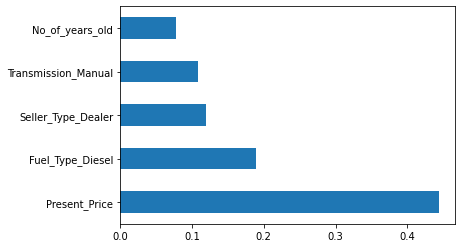

In [38]:
#plotting graph of feature importances for better visualization of dependency of dependent variable of Selling_price
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

# Train-Test Split

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train , X_test, y_train, y_test = train_test_split( X, y , test_size = 0.2 , random_state = 0)

In [41]:
# Selelction of Regressor model
from sklearn.ensemble import RandomForestRegressor

In [42]:
reg_model = RandomForestRegressor( n_estimators= 250 , random_state=  0)   #base_estimator / Meta_estimator

# We will run Hypertuning parameters
1) Grid search Cv 
2) Randomized Search Cv (Randomly parameter are selected)

In [43]:
# 1) Grid Search Cv
from sklearn.model_selection import GridSearchCV

In [44]:
params_grid = { 'n_estimators' : [100, 250, 500, 750, 1000],
                'max_depth' : [4,7,10],
                 'min_samples_split' : [ 2, 5 ,10],
                'max_features': ['auto', 'sqrt'],
                'min_samples_leaf' : [2,7,10]
              }

In [46]:
reg_model_grid = GridSearchCV(estimator=reg_model, param_grid=params_grid, cv=5, verbose= 0 , n_jobs=1, scoring='neg_mean_squared_error')

In [47]:
reg_model_grid.fit(X_train , y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=250, random_state=0),
             n_jobs=1,
             param_grid={'max_depth': [4, 7, 10],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [2, 7, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 250, 500, 750, 1000]},
             scoring='neg_mean_squared_error')

In [48]:
reg_model_grid.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [49]:
reg_model_grid.best_score_

-2.485715045514017

# Predicting

In [50]:
reg_model_grid_pred = reg_model_grid.predict(X_test)

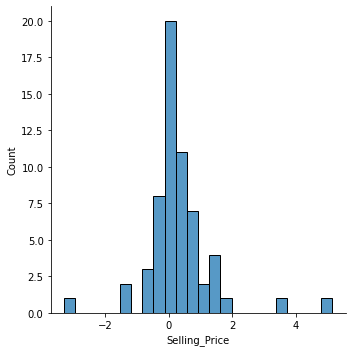

In [51]:
#Plotting Predictions
sns.displot(y_test - reg_model_grid_pred)

# Predicting Mse for Our Reg Model

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [55]:
#mean Squared Error
MSE = mean_squared_error(y_test , reg_model_grid_pred)
MSE

1.2113194871198594

In [56]:
#mean absolute error
MAE = mean_absolute_error(y_test, reg_model_grid_pred)
MAE

0.6258326058086884

We have Predicted Best Model with Help of Grid Search CV, we can also change parameters and look for further Good Accuracy       OR We Can Also go RandomSearchCV technique to find Best_fit_model with good Accuracy
